In [1]:
!pip install imblearn
!pip install xgboost

     |████████████████████████████████| 174kB 14.1MB/s eta 0:00:01
     |████████████████████████████████| 6.9MB 26.0MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1
You should consider upgrading via the 'pip install --upgrade pip' command.
     |████████████████████████████████| 127.6MB 90kB/s s eta 0:00:01    |███████████████▌                | 61.8MB 53.8MB/s eta 0:00:02
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
keras = tf.keras
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras.callbacks import History

In [4]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

In [6]:
from sklearn.metrics import confusion_matrix

In [7]:
import src.profit as f

In [8]:
data = pd.read_csv('bank-additional-full.csv',sep=';')

In [9]:
new_data = data.copy()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [11]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
new_data.y[new_data.y == 'yes'] = 1 # convery label column to int
new_data.y[new_data.y == 'no'] = 0 # convery label column to int

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


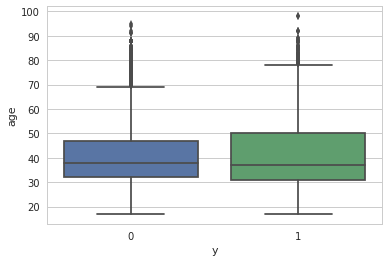

In [13]:
sns.set(style='whitegrid')
sns.boxplot(y='age',x='y',data=new_data)

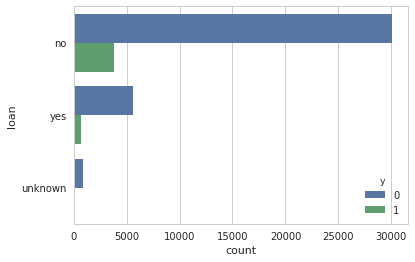

In [14]:
sns.set(style='whitegrid')
sns.countplot(y='loan',hue='y',data=new_data)

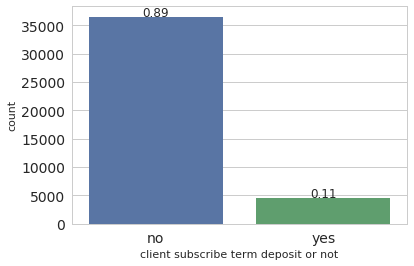

In [91]:
sns.set(style='whitegrid')
ax = sns.countplot(x='y', data=new_data)
total= float(len(new_data.y))
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+20,'{:1.2f}'.format(height/total),ha='center')
ax.set(xlabel='client subscribe term deposit or not')
ax.set_xticklabels(['no','yes'],fontsize=14)
ax.set_yticklabels([0,5000,10000,15000,20000,25000,30000,35000],fontsize=14)
plt.show()

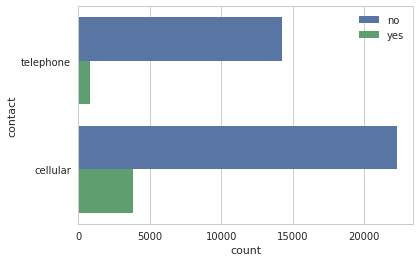

In [98]:
p = sns.countplot(y='contact',hue='y',data=new_data)
# ax.legend.new_labels=['no','yes']
leg = p.get_legend()
leg.set_title('')
labs = leg.texts
labs[0].set_text('no')
labs[1].set_text('yes')

In [17]:
new_data.groupby(['contact','y']).count() # rate of accept or reject with different contact

age    job  marital  education  default  housing   loan  month  \
contact   y                                                                     
cellular  0  22291  22291    22291      22291    22291    22291  22291  22291   
          1   3853   3853     3853       3853     3853     3853   3853   3853   
telephone 0  14257  14257    14257      14257    14257    14257  14257  14257   
          1    787    787      787        787      787      787    787    787   

             day_of_week  duration  campaign  pdays  previous  poutcome  \
contact   y                                                               
cellular  0        22291     22291     22291  22291     22291     22291   
          1         3853      3853      3853   3853      3853      3853   
telephone 0        14257     14257     14257  14257     14257     14257   
          1          787       787       787    787       787       787   

             emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
contact   y                                                           
cellular  0         22291           22291          22291      22291   
          1          3853            3853           3853       3853   
telephone 0         14257           14257          14257      14257   
          1           787             787            787        787   

             nr.employed  
contact   y               
cellular  0        22291  
          1         3853  
telephone 0        14257  
          1          787

In [18]:
new_data.y[new_data.y == 'yes'] = 1 # convery label column yes to 1
new_data.y[new_data.y == 'no'] = 0 # convery label column no to 0


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [19]:
new_data = new_data.astype({'y':'int64'})

In [20]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [21]:
new_data_df = pd.get_dummies(new_data, columns=['job','marital','education','day_of_week','default','housing','loan',
                                 'contact','month','poutcome'], drop_first=True)

In [22]:
new_X = new_data_df.loc[:,  new_data_df.columns != 'y'] # select X
# new_X = new_X.drop(['duration'],axis=1)

In [23]:
new_y = new_data_df.y

## train test split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(new_X.values,new_y.values,test_size=0.07,random_state=13) # doing train test split

##  resample

In [25]:
sm = SMOTE(sampling_strategy = 1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [26]:
new_X_train,new_X_test,new_y_train,new_y_test = train_test_split(X_train_res,y_train_res,test_size=0.3,random_state=15)

In [27]:
np.unique(new_y_train, return_counts = True) # checking if data is balance now

(array([0, 1]), array([23786, 23760]))

## Logistic Regression

In [28]:
logistic_model = LogisticRegression(max_iter= 100,random_state=0)

In [29]:
logistic_model.fit(new_X_train,new_y_train)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

In [30]:
logistic_model.score(new_X_test,new_y_test)

0.8521444695259593

In [31]:
logistic_model.score(X_test,y_test)

0.8346047156726768

In [32]:
f.accuracy_(logistic_model,X_test,y_test)

accuracy:0.8346047156726768
r2:-0.7851258973201072
f1:0.5117707267144319


In [33]:
f.get_confusion_matrix(logistic_model,X_test,y_test,threshold=0.5)
# confusion matrix
#([tp,fn],
#[fp,tn])

[[ 250   48]
 [ 429 2157]]
precision:0.36818851251840945, recall:0.8389261744966443
total profit:-170


## Random Forest

In [34]:
rf = RandomForestClassifier(n_estimators = 5000, max_depth = 6, min_samples_split = 3, random_state=0)

In [35]:
rf.fit(new_X_train,new_y_train)

RandomForestClassifier(max_depth=6, min_samples_split=3, n_estimators=5000,
                       random_state=0)

In [36]:
f.accuracy_(rf,X_test,y_test)

accuracy:0.8689320388349514
r2:-0.41462806957442466
f1:0.5310173697270472


In [37]:
f.get_confusion_matrix(rf,X_test,y_test,threshold=0.5) 
# confusion matrix
#([tp,fn],
#[fp,tn])

[[ 214   84]
 [ 294 2292]]
precision:0.421259842519685, recall:0.7181208053691275
total profit:-2240


In [38]:
f.accuracy_(rf,new_X_test,new_y_test) # test validation ,not actual result

accuracy:0.9225144763961135
r2:0.6900574010337104
f1:0.9249203556654463


In [39]:
f.get_confusion_matrix(rf,new_X_test,new_y_test,threshold=0.5)# test validation ,not actual result

[[9726  476]
 [1103 9073]]
precision:0.898143872933789, recall:0.9533424818663008
total profit:600130


## Gradient Boosting

In [40]:
gdb_model = GradientBoostingClassifier(learning_rate = 0.05,random_state=0)

In [41]:
gdb_model.fit(new_X_train,new_y_train)

GradientBoostingClassifier(learning_rate=0.05, random_state=0)

In [42]:
f.accuracy_(gdb_model,X_test,y_test)

accuracy:0.8918169209431346
r2:-0.1676295177439695
f1:0.5873015873015873


In [43]:
f.get_confusion_matrix(gdb_model,X_test,y_test,threshold=0.5)
# confusion matrix
#([tp,fn],
#[fp,tn])

[[ 222   76]
 [ 236 2350]]
precision:0.4847161572052402, recall:0.7449664429530202
total profit:860


In [44]:
f.accuracy_(gdb_model,new_X_test,new_y_test)# test validation ,not actual result

accuracy:0.9356659142212189
r2:0.7426632379703573
f1:0.9373057242599588


In [45]:
f.get_confusion_matrix(gdb_model,new_X_test,new_y_test,threshold=0.5)# test validation  ,not actual result
# confusion matrix
#([tp,fn],
#[fp,tn])

[[9800  402]
 [ 909 9267]]
precision:0.9151181249416379, recall:0.9605959615761616
total profit:618530


## XGboosting

In [46]:
xgb_model = XGBClassifier(colsample_bytree=0.7,
 learning_rate=0.05,
 max_depth=7,
 min_child_weight=11,
 n_estimators=1000,
 seed=1337,
 subsample=0.8)

In [47]:
xgb_model.fit(new_X_train,new_y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=7,
              min_child_weight=11, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              random_state=1337, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=1337, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [48]:
f.accuracy_(xgb_model,X_test,y_test)

accuracy:0.9174757281553398
r2:0.10930825249017706
f1:0.5734767025089605


In [49]:
f.get_confusion_matrix(xgb_model,X_test,y_test,threshold=0.5)
# confusion matrix
#([tp,fn],
#[fp,tn])

[[ 160  138]
 [ 100 2486]]
precision:0.6153846153846154, recall:0.5369127516778524
total profit:-5600


In [50]:
f.accuracy_(xgb_model,new_X_test,new_y_test)# test validation, ,not actual result

accuracy:0.9503386004514672
r2:0.8013540784332582
f1:0.9500296267035355


In [51]:
f.get_confusion_matrix(xgb_model,new_X_test,new_y_test,threshold=0.5)# test validation, ,not actual result
# confusion matrix
#([tp,fn],
#[fp,tn])

[[9620  582]
 [ 430 9746]]
precision:0.9572139303482587, recall:0.9429523622819055
total profit:602300


## feature importance for XG boosting

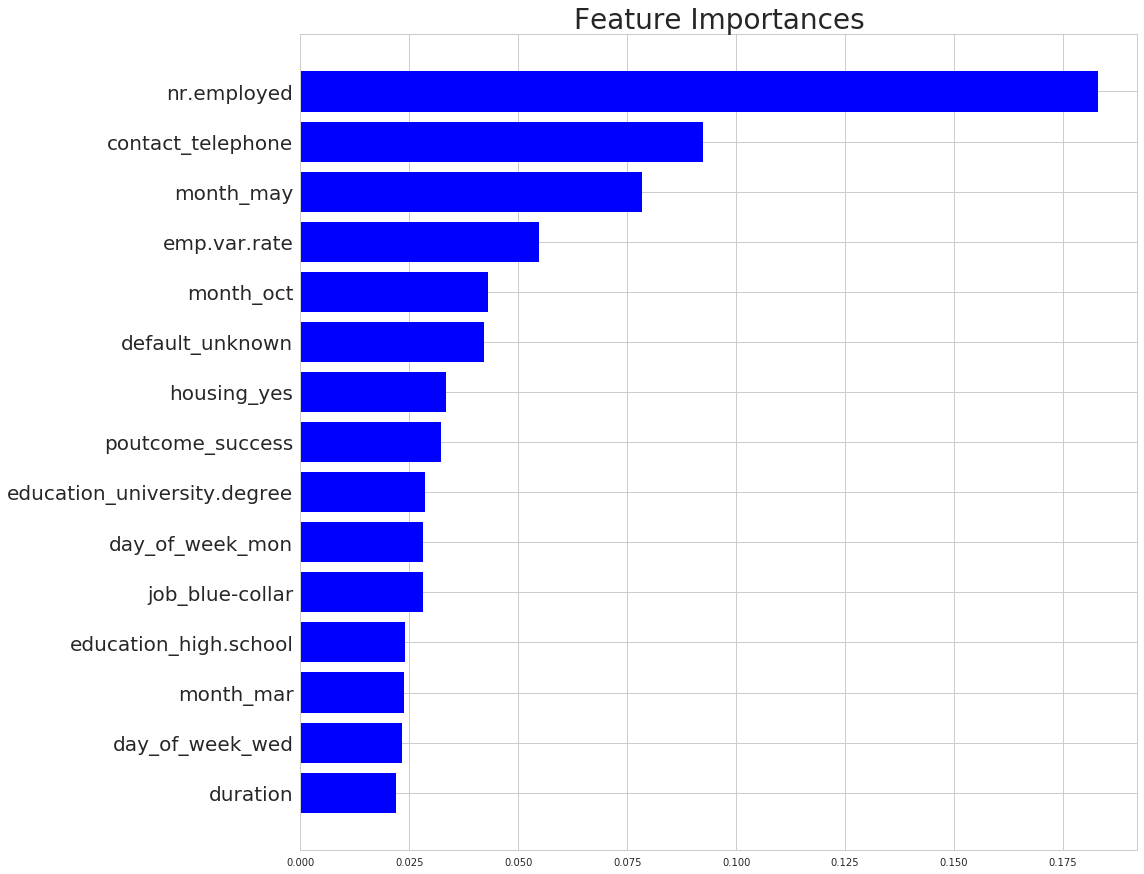

In [54]:
f.feat_imp(new_X, xgb_model, 15)


## Neural Network

In [56]:
nn_model = tf.keras.models.Sequential()

In [57]:
nn_model.add(keras.layers.Dense(units=100, input_dim=53,activation='relu'))
nn_model.add(Dropout(0.2))
# nn_model.add(keras.layers.Dense(units=60, activation='relu'))
# nn_model.add(keras.layers.Dense(units=60, activation='relu'))
# nn_model.add(Dropout(0.2))
nn_model.add(keras.layers.Dense(units=50, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(keras.layers.Dense(units=50, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(keras.layers.Dense(units=20, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(keras.layers.Dense(units=15, activation='relu'))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [58]:
nn_model.add(keras.layers.Dense(units=1,activation='sigmoid'))

In [59]:
ops = tf.keras.optimizers.Adam(learning_rate=0.0001)
nn_model.compile(loss='binary_crossentropy',
              optimizer=ops,
                metrics=[tf.keras.metrics.Recall()])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [60]:
history = History()

In [61]:
his =nn_model.fit(new_X_train, new_y_train, epochs=50, batch_size=16,validation_data = (new_X_test, new_y_test),
                     callbacks=[history])


Train on 47546 samples, validate on 20378 samples
Epoch 1/50
47546/47546 [==============================] - 18s 385us/sample - loss: 14.6576 - recall: 0.4703 - val_loss: 0.6874 - val_recall: 0.2373
Epoch 2/50
47546/47546 [==============================] - 17s 366us/sample - loss: 1.9134 - recall: 0.5074 - val_loss: 0.6902 - val_recall: 0.7941
Epoch 3/50
47546/47546 [==============================] - 17s 364us/sample - loss: 0.8488 - recall: 0.5816 - val_loss: 0.6571 - val_recall: 0.8519
Epoch 4/50
47546/47546 [==============================] - 17s 365us/sample - loss: 0.7047 - recall: 0.6610 - val_loss: 0.6511 - val_recall: 0.7002
Epoch 5/50
47546/47546 [==============================] - 17s 365us/sample - loss: 0.6476 - recall: 0.7246 - val_loss: 0.5407 - val_recall: 0.6902
Epoch 6/50
47546/47546 [==============================] - 20s 418us/sample - loss: 0.5774 - recall: 0.7769 - val_loss: 0.4984 - val_recall: 0.7251
Epoch 7/50
47546/47546 [==============================] - 17s 365us

In [167]:
print(history.history.keys()) # print out names on history

dict_keys(['loss', 'recall', 'val_loss', 'val_recall'])


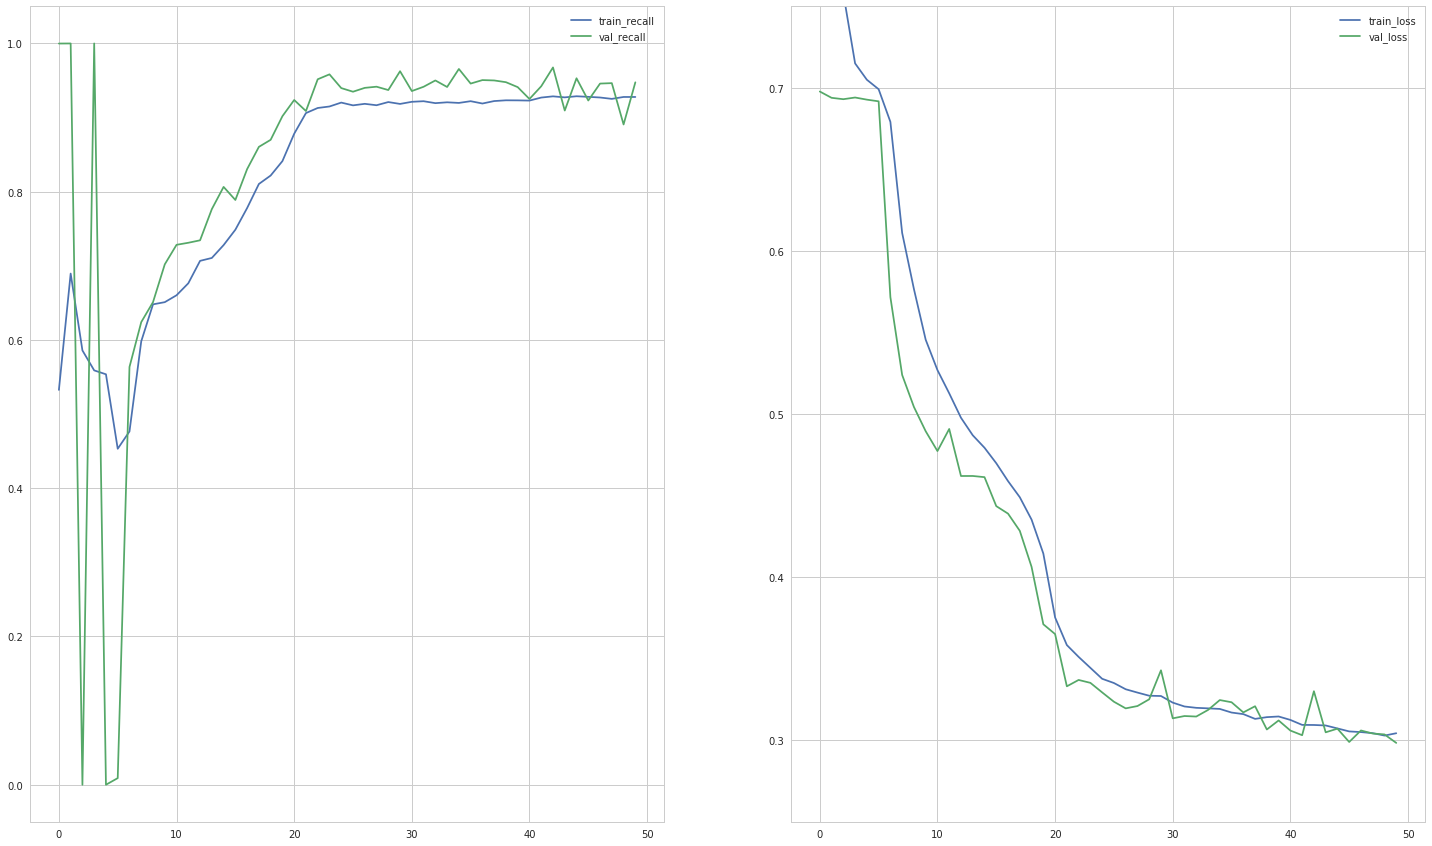

In [168]:
# this is history of validation loss.
# testing if neural network model is working correcting.
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
# everytime you run the neural network model, the history add up. such as (recall,recall_1,recall_2)
train_recall =history.history['recall'] # need to follow the previous cell output to change string
val_recall = history.history['val_recall'] #need to follow the previous cell output to change string
xc         = range(50)

fig,ax = plt.subplots(1,2,figsize=(25,15))

ax[0].plot(xc, train_recall,label='train_recall')
ax[0].plot(xc, val_recall,label='val_recall')
ax[1].plot(xc, train_loss,label='train_loss')
ax[1].plot(xc, val_loss,label='val_loss')

ax[1].set_ylim([0.25,0.75])

ax[0].legend()
ax[1].legend()



In [ ]:
nn_model.summary()

In [252]:
f.nn_get_confusion_matrix(nn_model,X_test,y_test,threshold=0.5)

[[ 290    8]
 [ 600 1986]]
precision:0.3258426966292135, recall:0.9731543624161074
total profit:1500


In [285]:
print(history.history.keys())

dict_keys(['loss', 'recall_12', 'val_loss', 'val_recall_12'])


## Cost Benefit matrix

In [195]:
cost_benefit_1 = np.array([[70, -100], [-30, 0]])
# cost benefit matrix
#([tp,fn],
#[fp,tn])
cost_benefit_1

array([[  70, -100],
       [ -30,    0]])

# Profit Curve

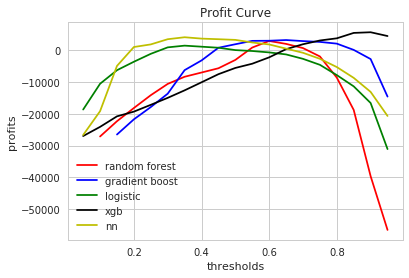

In [169]:
f.profit_curve(rf,gdb_model,logistic_model,xgb_model,nn_model,X_test,y_test)

# Result

In [182]:
f.find_best_profit(xgb_model,X_test,y_test)
# result for xgboosting with profit of $6130 threshold 0.9

(6130, 0.9000000000000002)

In [286]:
f.find_best_profit_nn(nn_model,X_test,y_test)
# result for neural network with profit of $3960 threshold 0.45

(3960, 0.45000000000000007)

In [184]:
f.find_best_profit(rf,X_test,y_test)
# result for random forest with profit of $2830 threshold 0.6

(2830, 0.6000000000000002)

In [186]:
f.find_best_profit(gdb_model,X_test,y_test)
# result for gradient boosting with profit of $3400 threshold 0.549

(3400, 0.5499999999999999)

In [187]:
f.find_best_profit(logistic_model,X_test,y_test)
# result for logistic regession with profit of $3490 threshold 0.549

(3490, 0.5499999999999999)

A false negative is a test result that indicates a person does not have a disease or condition when the person actually does have it, according to the National Institute of Health (NIH). False negative test results can occur in many different medical tests, from tests for pregnancy , tuberculosis or Lyme disease to tests for the presence of drugs or alcohol in the body.

Correspondingly, a false-positive test result indicates that a person has a specific disease or condition when the person actually does not have it. An example of a false positive is when a particular test designed to detect melanoma, a type of skin cancer , tests positive for the disease, even though the person does not have cancer.

## ROC curve

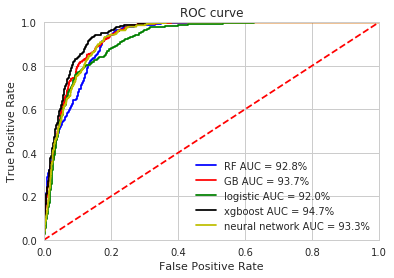

In [69]:
f.roc_curve_(rf,gdb_model,logistic_model,xgb_model,nn_model,X_test,y_test)

## grid search for best model(XGBoosting)

In [131]:
from sklearn.model_selection import cross_validate

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [123]:
from sklearn.grid_Search import GridSearchCV

In [168]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'learning_rate': [0.05,0.1], #so called `eta` value
              'max_depth': (6,7,8),
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [1000], #number of trees, change it to 1000 for better results
              'seed': [1337]}

In [169]:
clf = GridSearchCV(xgb_model,parameters,n_jobs=5,cv=StratifiedKFold(n_splits=5, shuffle=True), 
                   scoring='f1',
                   verbose=2, refit=True)

In [170]:
clf.fit(new_X_train,new_y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed: 14.8min finished


[00:47:56] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_...
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.05, 0.1], 'max_depth': (6, 7, 8),
                      

In [172]:
clf.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 7,
 'min_child_weight': 11,
 'n_estimators': 1000,
 'nthread': 4,
 'seed': 1337,
 'silent': 1,
 'subsample': 0.8}